In [1]:
import pandas as pd
from torch.utils.data import DataLoader,Dataset, Subset
import numpy as np
import tft_model
from data_formatters import ts_dataset  
import data_formatters.base
import expt_settings.configs
import importlib
from data_formatters import utils
import torch.optim as optim
import torch
from tqdm import tqdm
import pickle
import time

In [2]:
pd.set_option('max_columns', 1000)

In [3]:
importlib.reload(utils)

<module 'data_formatters.utils' from '/Users/liuxufeng/github/tft/Temporal_Fusion_Transform/data_formatters/utils.py'>

In [4]:
ExperimentConfig = expt_settings.configs.ExperimentConfig

config = ExperimentConfig('electricity', 'outputs')

data_formatter = config.make_data_formatter()


print("*** Training from defined parameters for {} ***".format('m4'))
data_csv_path = "./electricity/hourly_electricity.csv"
#data_csv_path = '/Users/ardakeskiner/Desktop/TUM/Courses/ws19_20/tft/tft_outputs/data/electricity/hourly_electricity.csv'
print("Loading & splitting data...")
raw_data = pd.read_csv(data_csv_path, index_col=0)
print(raw_data.shape)
start = time.time()
train, valid, test = data_formatter.split_data(raw_data)
train_samples, valid_samples = data_formatter.get_num_samples_for_calibration()
print(time.time()-start)



*** Training from defined parameters for m4 ***
Loading & splitting data...


/Users/liuxufeng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2198072, 13)
Formatting train-valid-test splits.
Setting scalers with training data...
MT_001 5256 192
MT_002 5256 192
MT_003 5256 192
MT_004 5256 192
MT_005 5256 192
MT_006 5256 192
MT_007 5256 192
MT_008 5256 192
MT_009 5256 192
MT_010 5256 192
MT_011 5256 192
MT_012 5256 192
MT_013 5256 192
MT_014 5256 192
MT_015 5256 192
MT_016 5256 192
MT_017 5256 192
MT_018 5256 192
MT_019 5256 192
MT_020 5256 192
MT_021 5256 192
MT_022 5256 192
MT_023 5256 192
MT_024 5256 192
MT_025 5256 192
MT_026 5256 192
MT_027 5256 192
MT_028 5256 192
MT_029 5256 192
MT_030 5256 192
MT_031 5256 192
MT_032 5256 192
MT_033 5256 192
MT_034 5256 192
MT_035 5256 192
MT_036 5256 192
MT_037 5256 192
MT_038 5256 192
MT_039 5256 192
MT_040 5256 192
MT_041 5256 192
MT_042 5256 192
MT_043 5256 192
MT_044 5256 192
MT_045 5256 192
MT_046 5256 192
MT_047 5256 192
MT_048 5256 192
MT_049 5256 192
MT_050 5256 192
MT_051 5256 192
MT_052 5256 192
MT_053 5256 192
MT_054 5256 192
MT_055 5256 192
MT_056 5256 192
MT_057 5256 192


MT_196 744 192
MT_197 744 192
MT_198 744 192
MT_199 744 192
MT_200 744 192
MT_201 744 192
MT_202 744 192
MT_203 744 192
MT_204 744 192
MT_205 744 192
MT_206 744 192
MT_207 744 192
MT_208 744 192
MT_209 744 192
MT_210 744 192
MT_211 744 192
MT_212 744 192
MT_213 744 192
MT_214 744 192
MT_215 744 192
MT_216 744 192
MT_217 744 192
MT_218 744 192
MT_219 744 192
MT_220 744 192
MT_221 744 192
MT_222 744 192
MT_224 744 192
MT_225 744 192
MT_226 744 192
MT_227 744 192
MT_228 744 192
MT_229 744 192
MT_230 744 192
MT_231 744 192
MT_232 744 192
MT_233 744 192
MT_234 744 192
MT_235 744 192
MT_236 744 192
MT_237 744 192
MT_238 744 192
MT_239 744 192
MT_240 744 192
MT_241 744 192
MT_242 744 192
MT_243 744 192
MT_244 744 192
MT_245 744 192
MT_246 744 192
MT_247 744 192
MT_248 744 192
MT_249 744 192
MT_250 744 192
MT_251 744 192
MT_252 744 192
MT_253 744 192
MT_254 744 192
MT_255 744 192
MT_256 744 192
MT_257 744 192
MT_258 744 192
MT_259 744 192
MT_260 744 192
MT_261 744 192
MT_262 744 192
MT_263 744

In [24]:
raw_data.head(30)

,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4
17549,2.538071,26309.0,1096,MT_001,2014-01-01 05:00:00,MT_001,5,1,2,1,26309.0,2,5
17550,3.172589,26310.0,1096,MT_001,2014-01-01 06:00:00,MT_001,6,1,2,1,26310.0,2,6
17551,2.855330,26311.0,1096,MT_001,2014-01-01 07:00:00,MT_001,7,1,2,1,26311.0,2,7
17552,1.269036,26312.0,1096,MT_001,2014-01-01 08:00:00,MT_001,8,1,2,1,26312.0,2,8
17553,0.317259,26313.0,1096,MT_001,2014-01-01 09:00:00,MT_001,9,1,2,1,26313.0,2,9


In [22]:
raw_data["power_usage"].describe()

count    2.198072e+06
mean     6.169692e+02
std      3.632925e+03
min      0.000000e+00
25%      5.149182e+01
50%      1.208142e+02
75%      3.076074e+02
max      1.681000e+05
Name: power_usage, dtype: float64

In [6]:
raw_data["days_from_start"].min(), raw_data["days_from_start"].max()

(1096, 1345)

In [7]:
train["days_from_start"].min(), train["days_from_start"].max()

(1096, 1314)

In [8]:
valid["days_from_start"].min(), valid["days_from_start"].max()

(1308, 1338)

In [9]:
test["days_from_start"].min(), test["days_from_start"].max()

(1332, 1345)

In [10]:
train_samples, valid_samples

(450000, 50000)

In [11]:
# Sets up default params
fixed_params = data_formatter.get_experiment_params()
params = data_formatter.get_default_model_params()

fixed_params.update(params)
fixed_params['batch_first'] = True
fixed_params['name'] = 'test'
fixed_params['device'] = 'cpu' # torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# fixed_params['minibatch_size'] = 64
# fixed_params['category_count'] = [6]
device = fixed_params['device']
fixed_params['quantiles'] = [0.5]

# with open('data_formatter_m4.pkl', 'wb') as output:  # Overwrites any existing file.
#     pickle.dump(data_formatter, output, pickle.HIGHEST_PROTOCOL)



In [31]:
data_formatter._target_scaler

{'MT_001': StandardScaler(),
 'MT_002': StandardScaler(),
 'MT_003': StandardScaler(),
 'MT_004': StandardScaler(),
 'MT_005': StandardScaler(),
 'MT_006': StandardScaler(),
 'MT_007': StandardScaler(),
 'MT_008': StandardScaler(),
 'MT_009': StandardScaler(),
 'MT_010': StandardScaler(),
 'MT_011': StandardScaler(),
 'MT_012': StandardScaler(),
 'MT_013': StandardScaler(),
 'MT_014': StandardScaler(),
 'MT_015': StandardScaler(),
 'MT_016': StandardScaler(),
 'MT_017': StandardScaler(),
 'MT_018': StandardScaler(),
 'MT_019': StandardScaler(),
 'MT_020': StandardScaler(),
 'MT_021': StandardScaler(),
 'MT_022': StandardScaler(),
 'MT_023': StandardScaler(),
 'MT_024': StandardScaler(),
 'MT_025': StandardScaler(),
 'MT_026': StandardScaler(),
 'MT_027': StandardScaler(),
 'MT_028': StandardScaler(),
 'MT_029': StandardScaler(),
 'MT_030': StandardScaler(),
 'MT_031': StandardScaler(),
 'MT_032': StandardScaler(),
 'MT_033': StandardScaler(),
 'MT_034': StandardScaler(),
 'MT_035': Sta

In [32]:
data_formatter._cat_scalers

{'categorical_id': LabelEncoder()}

In [30]:
dir(data_formatter)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_cat_scalers',
 '_column_definition',
 '_get_input_columns',
 '_get_tft_input_indices',
 '_num_classes_per_cat_input',
 '_real_scalers',
 '_target_scaler',
 '_time_steps',
 'format_predictions',
 'get_column_definition',
 'get_default_model_params',
 'get_experiment_params',
 'get_fixed_params',
 'get_num_samples_for_calibration',
 'identifiers',
 'num_classes_per_cat_input',
 'set_scalers',
 'split_data',
 'transform_inputs']

In [12]:
raw_data

,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461482,20824.324324,32299.0,1345,MT_370,2014-09-07 19:00:00,MT_370,19,7,6,9,32299.0,6,19
10461483,19527.027027,32300.0,1345,MT_370,2014-09-07 20:00:00,MT_370,20,7,6,9,32300.0,6,20
10461484,20202.702703,32301.0,1345,MT_370,2014-09-07 21:00:00,MT_370,21,7,6,9,32301.0,6,21
10461485,19851.351351,32302.0,1345,MT_370,2014-09-07 22:00:00,MT_370,22,7,6,9,32302.0,6,22


In [13]:
fixed_params

{'total_time_steps': 192,
 'num_encoder_steps': 168,
 'num_epochs': 100,
 'early_stopping_patience': 5,
 'multiprocessing_workers': 5,
 'column_definition': [('id', <DataTypes.REAL_VALUED: 0>, <InputTypes.ID: 4>),
  ('hours_from_start', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>),
  ('power_usage', <DataTypes.REAL_VALUED: 0>, <InputTypes.TARGET: 0>),
  ('hour', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>),
  ('day_of_week', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>),
  ('hours_from_start',
   <DataTypes.REAL_VALUED: 0>,
   <InputTypes.KNOWN_INPUT: 2>),
  ('categorical_id',
   <DataTypes.CATEGORICAL: 1>,
   <InputTypes.STATIC_INPUT: 3>)],
 'input_size': 5,
 'output_size': 1,
 'category_counts': [369],
 'input_obs_loc': [0],
 'static_input_loc': [4],
 'known_regular_inputs': [1, 2, 3],
 'known_categorical_inputs': [],
 'dropout_rate': 0.1,
 'hidden_layer_size': 160,
 'learning_rate': 0.001,
 'minibatch_size': 64,
 'max_gradient_norm': 0.01,
 'num_heads': 4

In [14]:
max_samples = 256  #* 200 * 2
elect = ts_dataset.TSDataset(fixed_params, max_samples, train)

# with open('ts_dataset_m4.pkl', 'wb') as output:  # Overwrites any existing file.
#     pickle.dump(elect, output, pickle.HIGHEST_PROTOCOL)

# with open('ts_dataset_m4.pkl', 'rb') as input:
#     elect = pickle.load(input)

Getting valid sampling locations.
# available segments=1853057
Extracting 256 samples...


In [15]:
loader = DataLoader(
            elect,
            batch_size=fixed_params['minibatch_size'],
            num_workers=2,
            shuffle=False
        )

In [16]:
importlib.reload(tft_model)
model = tft_model.TFT(fixed_params).to(device)

{'total_time_steps': 192, 'num_encoder_steps': 168, 'num_epochs': 100, 'early_stopping_patience': 5, 'multiprocessing_workers': 5, 'column_definition': [('id', <DataTypes.REAL_VALUED: 0>, <InputTypes.ID: 4>), ('hours_from_start', <DataTypes.REAL_VALUED: 0>, <InputTypes.TIME: 5>), ('power_usage', <DataTypes.REAL_VALUED: 0>, <InputTypes.TARGET: 0>), ('hour', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('day_of_week', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('hours_from_start', <DataTypes.REAL_VALUED: 0>, <InputTypes.KNOWN_INPUT: 2>), ('categorical_id', <DataTypes.CATEGORICAL: 1>, <InputTypes.STATIC_INPUT: 3>)], 'input_size': 5, 'output_size': 1, 'category_counts': [369], 'input_obs_loc': [0], 'static_input_loc': [4], 'known_regular_inputs': [1, 2, 3], 'known_categorical_inputs': [], 'dropout_rate': 0.1, 'hidden_layer_size': 160, 'learning_rate': 0.001, 'minibatch_size': 64, 'max_gradient_norm': 0.01, 'num_heads': 4, 'stack_size': 1, 'batch_first': True, 'n

In [17]:
from losses.quantile_loss import QuantileLoss
from losses.smape_loss import SMAPELoss
from losses.rmsse_loss import RMSSELoss
from losses.pinball_loss import PinballLoss


q_loss_func = RMSSELoss(fixed_params['device'])
# q_loss_func = SMAPELoss(fixed_params['device'])
# q_loss_func = QuantileLoss(fixed_params['quantiles'])
# import sys
# sys.path.append('/home/arda/Desktop/thesis/')
# from loss_modules import PinballLoss
q_loss_func = PinballLoss(0.45, device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
model.train()


TFT(
  (embeddings): ModuleList(
    (0): Embedding(369, 160)
  )
  (static_input_layer): Linear(in_features=160, out_features=160, bias=True)
  (time_varying_embedding_layer): LinearLayer(
    (layer): TimeDistributed(
      (module): Linear(in_features=1, out_features=160, bias=True)
    )
  )
  (static_combine_and_mask): StaticCombineAndMask(
    (flattened_grn): GatedResidualNetwork(
      (linear_layer): LinearLayer(
        (layer): Linear(in_features=160, out_features=1, bias=True)
      )
      (hidden_linear_layer1): LinearLayer(
        (layer): Linear(in_features=160, out_features=160, bias=True)
      )
      (hidden_context_layer): LinearLayer(
        (layer): Linear(in_features=160, out_features=160, bias=True)
      )
      (hidden_linear_layer2): LinearLayer(
        (layer): Linear(in_features=160, out_features=160, bias=True)
      )
      (elu1): ELU(alpha=1.0)
      (glu): GLU(
        (dropout): Dropout(p=0.1, inplace=False)
        (activation_layer): LinearLayer

In [55]:
model.train()
epochs=5
losses = []
for i in range(epochs):
    epoch_loss = [] 
    progress_bar = tqdm(enumerate(loader), total=len(loader))
    for batch_num, batch in progress_bar:
        optimizer.zero_grad()
        output, all_inputs, attention_components = model(batch['inputs'])
#         loss= q_loss_func(output[:,:,:].view(-1,1), batch['outputs'][:,:,0].flatten().float().to(device))
        loss = q_loss_func(output.squeeze(2), batch['outputs'][:,:,0].float().to(device))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), fixed_params['max_gradient_norm'])
        optimizer.step()
        epoch_loss.append(loss.item())
    
    losses.append(np.mean(epoch_loss))
    if loss.item() <= min(losses):
        torch.save(model.state_dict(), 'electricity_best_model_smape_loss.pth')
        
    print(np.mean(epoch_loss))
    

  0%|          | 0/4 [00:00<?, ?it/s]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 25%|██▌       | 1/4 [00:02<00:07,  2.66s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 50%|█████     | 2/4 [00:05<00:05,  2.53s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 75%|███████▌  | 3/4 [00:17<00:07,  7.11s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


100%|██████████| 4/4 [00:20<00:00,  5.05s/it]

0.4982758238911629



  0%|          | 0/4 [00:00<?, ?it/s]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 25%|██▌       | 1/4 [00:02<00:07,  2.61s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 50%|█████     | 2/4 [00:05<00:05,  2.51s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 75%|███████▌  | 3/4 [00:07<00:02,  2.52s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


100%|██████████| 4/4 [00:10<00:00,  2.53s/it]

0.4814930036664009



  0%|          | 0/4 [00:00<?, ?it/s]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 25%|██▌       | 1/4 [00:02<00:08,  2.70s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 50%|█████     | 2/4 [00:05<00:05,  2.59s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 75%|███████▌  | 3/4 [00:07<00:02,  2.55s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


100%|██████████| 4/4 [00:10<00:00,  2.55s/it]

0.4634839668869972



  0%|          | 0/4 [00:00<?, ?it/s]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 25%|██▌       | 1/4 [00:02<00:07,  2.66s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 50%|█████     | 2/4 [00:05<00:05,  2.52s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 75%|███████▌  | 3/4 [00:07<00:02,  2.50s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


100%|██████████| 4/4 [00:09<00:00,  2.48s/it]

0.4671187773346901



  0%|          | 0/4 [00:00<?, ?it/s]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 25%|██▌       | 1/4 [00:02<00:07,  2.53s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 50%|█████     | 2/4 [00:04<00:04,  2.45s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


 75%|███████▌  | 3/4 [00:07<00:02,  2.43s/it]

all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])


100%|██████████| 4/4 [00:09<00:00,  2.44s/it]

0.42798563092947006


In [65]:
def eval_test():
    max_samples = 1000
    test_elect = ts_dataset.TSDataset(fixed_params, max_samples, test)
    loader = DataLoader(
            test_elect,
            batch_size=fixed_params['minibatch_size'],
            num_workers=2,
            shuffle=False
        )
    
    total_outputs = []
    total_ids = []
    total_times = []
    for batch in loader:
        test_inputs = batch["inputs"]
        test_outputs = batch["outputs"]
        active_entries = batch["active_entries"]
        time = batch["time"]
        identifier = batch["identifier"]
        
        output, all_inputs, attention_components = model(test_inputs)
        total_outputs.append(output)
        total_ids.append(identifier)
        total_times.append(time)
    return total_ids, total_times, total_outputs


In [66]:
test_ids, test_times, test_outputs = eval_test()

Getting valid sampling locations.
# available segments=53505
Extracting 1000 samples...
1000 of 1000 samples done...
all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])
all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])
all_inputs:torch.Size([64, 192, 5]), unknown_inputs:None, known_combined_layer:torch.Size([64, 192, 160, 3]), obs_inputs:torch.Size([64, 192, 160, 1]), static_inputs:torch.Size([64, 1, 160])
historical_inputs:torch.Size([64, 168, 160, 4]), future_inputs:torch.Size([64, 24, 160, 3])
all_inputs:torch.Size([64, 192, 5]

In [71]:
output[0,:,0].shape

torch.Size([24])

In [69]:
output.shape

torch.Size([64, 24, 1])

In [68]:
len(test_ids[0]), test_outputs[0].shape

(192, torch.Size([64, 24, 1]))

In [ ]:
test_ids, test_times, test_outputs

In [33]:
test.shape

(123984, 13)

In [41]:
test_elect.keys()

AttributeError: 'TSDataset' object has no attribute 'keys'

In [35]:
## 测试集的model结果
test_elect = ts_dataset.TSDataset(fixed_params, max_samples, test)


Getting valid sampling locations.
# available segments=53505
Extracting 256 samples...


In [37]:
t1 = next(iter(test_elect))

In [48]:
len(t1["identifier"])

192

In [47]:
t1["inputs"].shape

(192, 5)

In [26]:
from pandas import DataFrame, Series
pred = Series(output[ind,:,0].detach().cpu().numpy())
label = Series(batch['outputs'][ind,:,0])

count    24.000000
mean     -0.420291
std       0.400840
min      -1.109453
25%      -0.753975
50%      -0.244248
75%      -0.118187
max       0.075995
dtype: float64

31


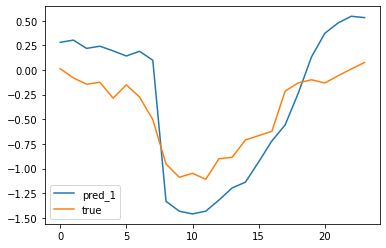

In [20]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.random.choice(64)
print(ind)
plt.plot(output[ind,:,0].detach().cpu().numpy(), label='pred_1')
# plt.plot(output[ind,:,1].detach().cpu().numpy(), label='pred_5')
# plt.plot(output[ind,:,2].detach().cpu().numpy(), label='pred_9')

plt.plot(batch['outputs'][ind,:,0], label='true')
plt.legend()

In [38]:
def symmetric_mean_absolute_percentage_error(forecast, actual):
    # Symmetric Mean Absolute Percentage Error (SMAPE)
    sequence_length = forecast.shape[1]
    sumf = np.sum(np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)), axis=1)
    return np.mean((2 * sumf) / sequence_length)

In [39]:
symmetric_mean_absolute_percentage_error(output[:,:,0].detach().cpu().numpy(),
                                        batch['outputs'][:,:,0].detach().cpu().numpy())



0.5027896522704651